In [1]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
red = pd.read_csv('winequality-red.csv', delimiter=';')
white = pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
white['kind'] = 'white'
red['kind'] = 'red'

combo = pd.concat([white, red], ignore_index=True)

In [4]:
combo.dropna()
combo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
red_white_proportion = np.unique(combo['kind'], return_counts=True)
red_white_proportion

(array(['red', 'white'], dtype=object), array([1599, 4898], dtype=int64))

In [6]:
y = combo['kind']
X_all = combo.drop(columns=['kind'])
X_less_regulation = combo.drop(columns=['free sulfur dioxide', 'total sulfur dioxide','kind'])

In [7]:
X_less_regulation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6


In [8]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.4, random_state=0)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_less_regulation, y, test_size=0.4, random_state=0)

In [9]:
clf_all = DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=0)
clf_all.fit(X_all_train,y_all_train)
y_all_pred = clf_all.predict(X_all_test)
print("classification report for wine type with all features\n")
print(classification_report(y_all_test, y_all_pred, zero_division=0))
score_all = clf_all.score(X_all_test,y_all_test)

classification report for wine type with all features

              precision    recall  f1-score   support

         red       0.95      0.98      0.96       626
       white       0.99      0.98      0.99      1973

    accuracy                           0.98      2599
   macro avg       0.97      0.98      0.98      2599
weighted avg       0.98      0.98      0.98      2599



In [10]:
clf_reg = DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=0)
clf_reg.fit(X_reg_train,y_reg_train)
y_reg_pred = clf_reg.predict(X_reg_test)
print("classification report for wine type with only non-regulated features\n")
print(classification_report(y_reg_test, y_reg_pred, zero_division=0))
score_reg = clf_reg.score(X_reg_test,y_reg_test)

classification report for wine type with only non-regulated features

              precision    recall  f1-score   support

         red       0.95      0.95      0.95       626
       white       0.98      0.98      0.98      1973

    accuracy                           0.97      2599
   macro avg       0.97      0.97      0.97      2599
weighted avg       0.98      0.97      0.98      2599



depth of 12


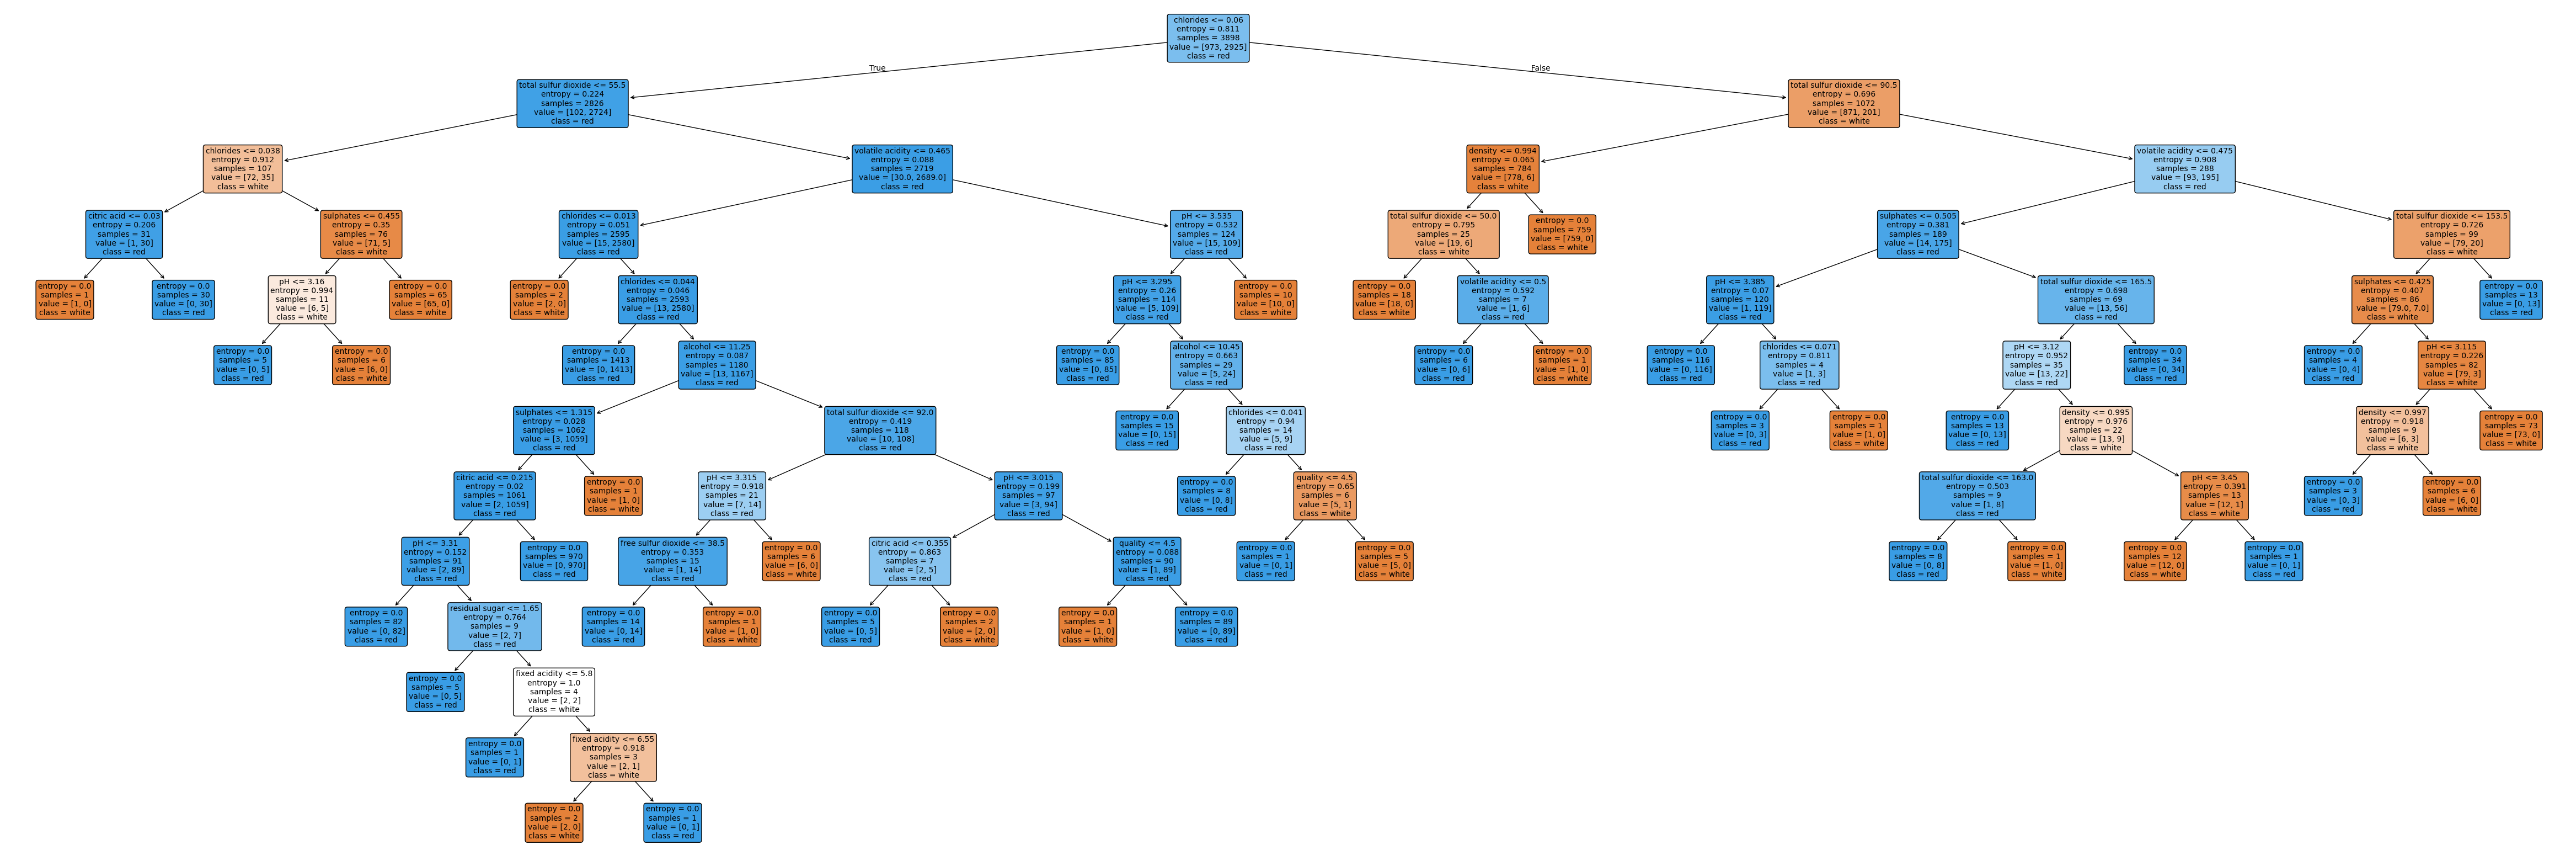

In [11]:
plt.figure(figsize=(60,20))
plot_tree(clf_all, feature_names=X_all_test.columns, class_names=y.unique(), filled=True, rounded=True, fontsize=10)
print("depth of " + str(clf_all.get_depth()))
plt.show()

depth of 14


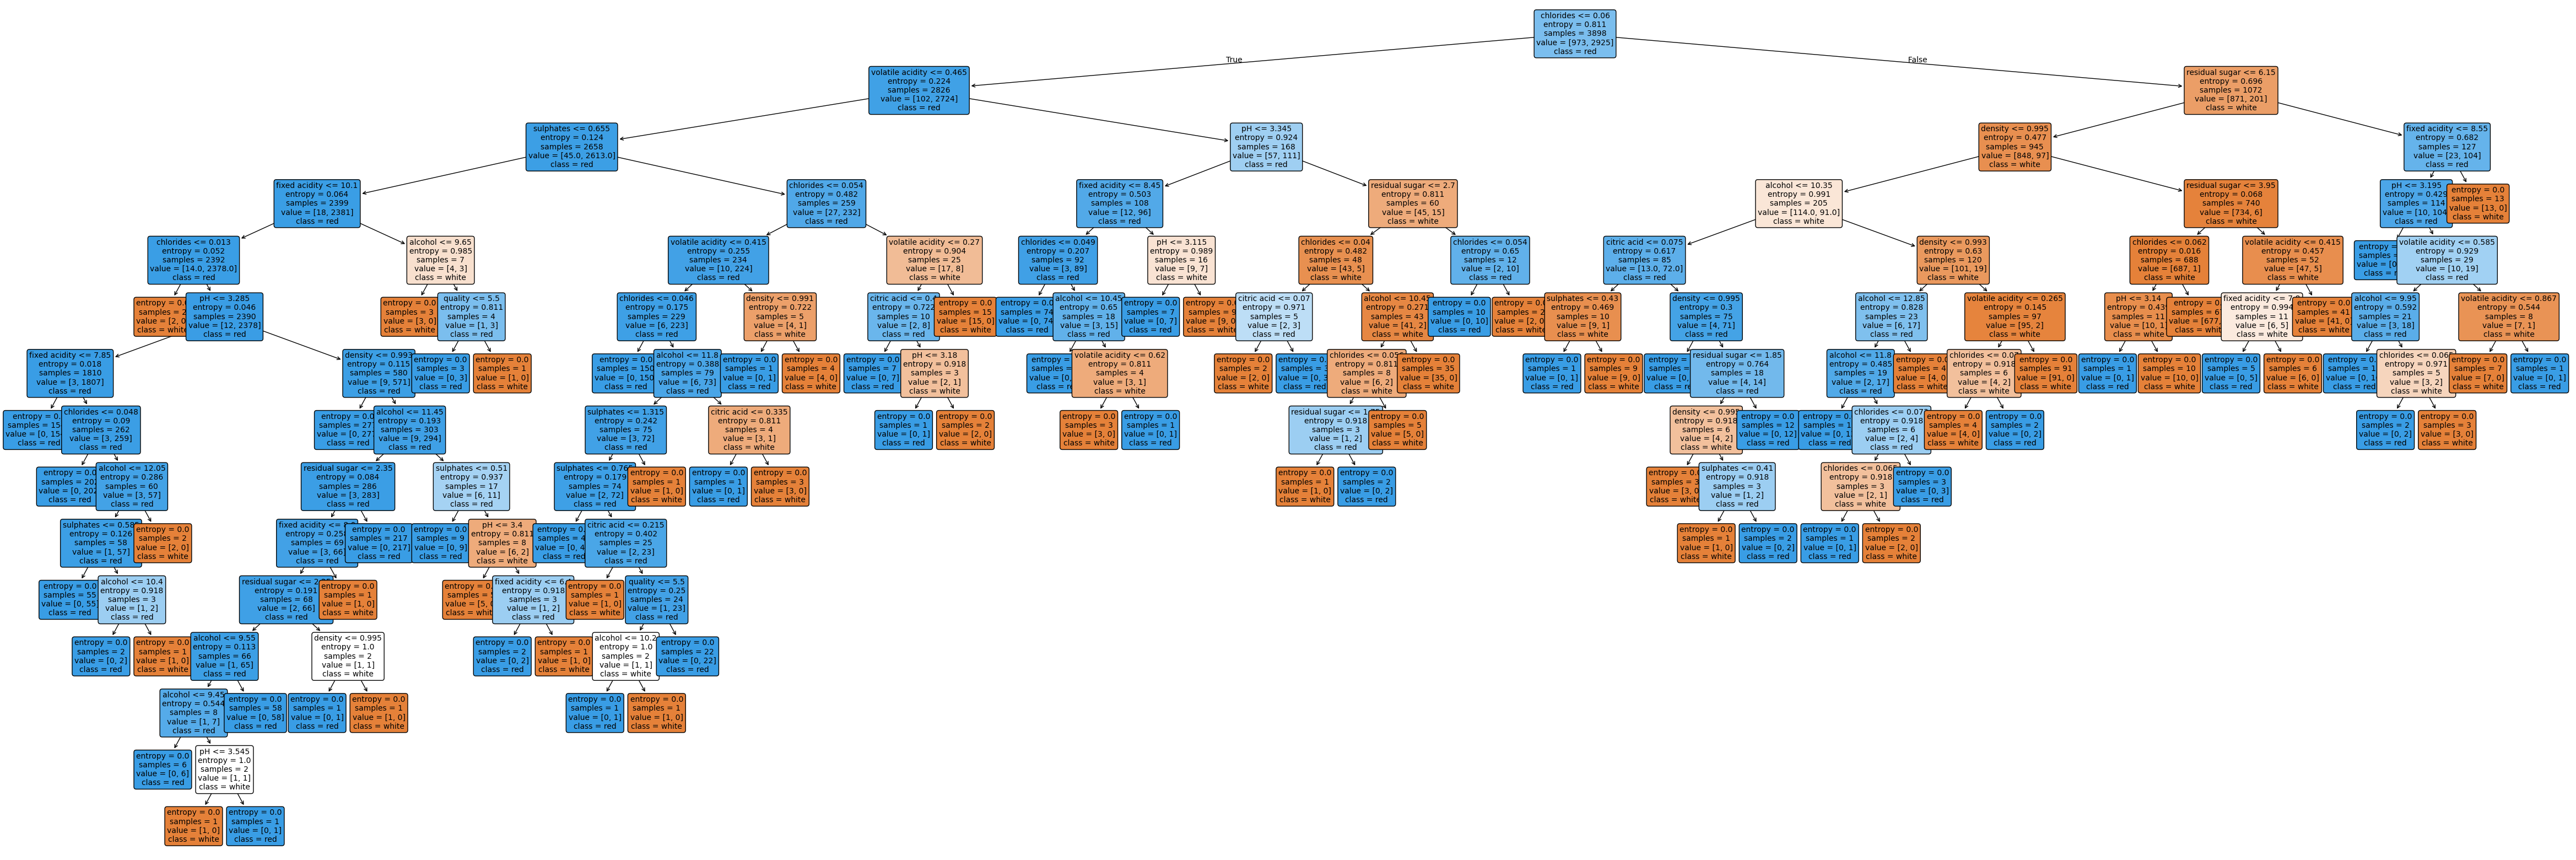

In [12]:
plt.figure(figsize=(60,20))
plot_tree(clf_reg, feature_names=X_reg_test.columns, class_names=y.unique(),filled=True, rounded=True, fontsize=10)
print("depth of " + str(clf_reg.get_depth()))
plt.show()